# Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: 2/16/21 8 AM PST
* Instructor name: Jeff Herman
* Blog post URL: https://dquillao.github.io/module_1_final_project

# 1. Import libraries

In [334]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Load data

## The following 3 csv's will be analyzed:
- tn.movie_budgets.csv.gz
- tmdb.movies.csv.gz
- imdb.title.basics.csv.gz

Note: Upon review of the 11 data sets, I found that the 3 above contained the columns that I am most interested in and were already fairly clean. I will be focusing my analysis around budget and profit.

### A. tn.movie_budgets.csv.gz
- Referred to as 'budget_gross_df'

In [335]:
budget_gross_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [336]:
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [337]:
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### B. tmdb.movies.csv.gz
- Referred to as 'rating_df'

In [338]:
rating_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')

In [339]:
rating_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [340]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### C. imdb.title.basics.csv.gz
- Referred to as 'runtime_genre_df'

In [341]:
runtime_genre_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')

In [342]:
runtime_genre_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [343]:
runtime_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# 3. Data Cleaning

In [344]:
def clean_money(col):
    """
    Function to remove $ and comma, convert to int
    """
    col = col.str.replace('$', '')
    return col.str.replace(',', '').astype(int)

### A. budget_gross_df

In [345]:
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Action items
- Remove id column
- Update release date to YYYY-MM-DD format
- Lowercase movie for case consistency
- Rename movie to title
- Remove '$' & ',' in production_budget, domestic_gross, worldwide_gross
- Convert from str to int for production_budget, domestic_gross, worldwide_gross

In [346]:
#Update release_date to datetime format
budget_gross_df['release_date'] = pd.to_datetime(budget_gross_df['release_date'], infer_datetime_format=True)
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [347]:
#Lowercase movie
budget_gross_df['movie'] = budget_gross_df['movie'].str.lower()
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [348]:
#Remove'$' and ',' from production_budget and convert to int
budget_gross_df['production_budget'] = clean_money(budget_gross_df['production_budget'])
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,"$241,063,875","$1,045,663,875"
2,3,2019-06-07,dark phoenix,350000000,"$42,762,350","$149,762,350"
3,4,2015-05-01,avengers: age of ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,"$620,181,382","$1,316,721,747"


In [349]:
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 271.2+ KB


In [350]:
#Remove'$' and ',' from domestic_gross and convert to int
budget_gross_df['domestic_gross'] = clean_money(budget_gross_df['domestic_gross'])
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,"$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,"$1,045,663,875"
2,3,2019-06-07,dark phoenix,350000000,42762350,"$149,762,350"
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,"$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,"$1,316,721,747"


In [351]:
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 271.2+ KB


In [352]:
#Remove'$' and ',' from worldwide_gross and convert to int
budget_gross_df['worldwide_gross'] = clean_money(budget_gross_df['worldwide_gross'])

In [353]:
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [354]:
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [355]:
#Rename movie to title
budget_gross_df = budget_gross_df.rename(columns = {'movie': 'title'})
budget_gross_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [356]:
# Remove column id
budget_gross_df = budget_gross_df.drop('id', axis=1)
budget_gross_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000,760507625,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,2019-06-07,dark phoenix,350000000,42762350,149762350
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


### B. rating

In [357]:
rating_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [358]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Action items:


- Delete columns 'Unnamed: 0', 'genre_ids', 'id', 'original_title', 'release_date' (since budget_gross already has it)
- Lowercase title
- Change vote_average from str to float

In [359]:
#Delete unnecessary columns
rating_df = rating_df.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_title', 'release_date'],axis=1)
rating_df.head()

,original_language,popularity,title,vote_average,vote_count
0,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,28.734,How to Train Your Dragon,7.7,7610
2,en,28.515,Iron Man 2,6.8,12368
3,en,28.005,Toy Story,7.9,10174
4,en,27.920,Inception,8.3,22186


In [360]:
#Lowercase title
rating_df['title'] = rating_df['title'].str.lower()
rating_df.head()

,original_language,popularity,title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


In [361]:
#Change vote_average to float
rating_df['vote_average'] = rating_df['vote_average'].astype(float)
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   popularity         26517 non-null  float64
 2   title              26517 non-null  object 
 3   vote_average       26517 non-null  float64
 4   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


### C. runtime_genre

In [362]:
runtime_genre_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Action items

- Remove columns: 'tconst', 'original title', 'start_year'
- Lowercase primary_title
- Lowercase genres
- Change primary_title to title

In [363]:
#drop columns
runtime_genre_df = runtime_genre_df.drop(['tconst', 'original_title', 'start_year'], axis=1)
runtime_genre_df.head()

,primary_title,runtime_minutes,genres
0,Sunghursh,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,The Other Side of the Wind,122.0,Drama
3,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [364]:
#lowercase primary_title
runtime_genre_df['primary_title'] = runtime_genre_df['primary_title'].str.lower()
runtime_genre_df.head()

,primary_title,runtime_minutes,genres
0,sunghursh,175.0,"Action,Crime,Drama"
1,one day before the rainy season,114.0,"Biography,Drama"
2,the other side of the wind,122.0,Drama
3,sabse bada sukh,NaN,"Comedy,Drama"
4,the wandering soap opera,80.0,"Comedy,Drama,Fantasy"


In [365]:
#lowercase genres
runtime_genre_df['genres'] = runtime_genre_df['genres'].str.lower()
runtime_genre_df.head()

,primary_title,runtime_minutes,genres
0,sunghursh,175.0,"action,crime,drama"
1,one day before the rainy season,114.0,"biography,drama"
2,the other side of the wind,122.0,drama
3,sabse bada sukh,NaN,"comedy,drama"
4,the wandering soap opera,80.0,"comedy,drama,fantasy"


In [366]:
#change column name primary_title to title
runtime_genre_df = runtime_genre_df.rename(columns = {'primary_title': 'title'})
runtime_genre_df.head()

,title,runtime_minutes,genres
0,sunghursh,175.0,"action,crime,drama"
1,one day before the rainy season,114.0,"biography,drama"
2,the other side of the wind,122.0,drama
3,sabse bada sukh,NaN,"comedy,drama"
4,the wandering soap opera,80.0,"comedy,drama,fantasy"


# 4. Merge 3 dataframes into 1 using inner join
- budget_gross_df
- rating_df
- runtime_genre_df

Note: Merged dataframe is referred to as final_df

In [367]:
budget_gross_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000,760507625,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,2019-06-07,dark phoenix,350000000,42762350,149762350
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [368]:
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   title              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 226.0+ KB


In [369]:
rating_df.head()

,original_language,popularity,title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


In [370]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   popularity         26517 non-null  float64
 2   title              26517 non-null  object 
 3   vote_average       26517 non-null  float64
 4   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


In [371]:
runtime_genre_df.head()

,title,runtime_minutes,genres
0,sunghursh,175.0,"action,crime,drama"
1,one day before the rainy season,114.0,"biography,drama"
2,the other side of the wind,122.0,drama
3,sabse bada sukh,NaN,"comedy,drama"
4,the wandering soap opera,80.0,"comedy,drama,fantasy"


In [372]:
runtime_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            146144 non-null  object 
 1   runtime_minutes  114405 non-null  float64
 2   genres           140736 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.3+ MB


In [373]:
#Merge inner on title
final_df = budget_gross_df.merge(rating_df, on='title').merge(runtime_genre_df, on='title')
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,horror
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,en,30.579,6.4,8571,136.0,"action,adventure,fantasy"
2,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,en,44.383,7.3,13457,141.0,"action,adventure,sci-fi"
3,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,en,80.773,8.3,13948,149.0,"action,adventure,sci-fi"
4,2017-11-17,justice league,300000000,229024295,655945209,en,34.953,6.2,7510,120.0,"action,adventure,fantasy"


In [374]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 0 to 4714
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4715 non-null   datetime64[ns]
 1   title              4715 non-null   object        
 2   production_budget  4715 non-null   int64         
 3   domestic_gross     4715 non-null   int64         
 4   worldwide_gross    4715 non-null   int64         
 5   original_language  4715 non-null   object        
 6   popularity         4715 non-null   float64       
 7   vote_average       4715 non-null   float64       
 8   vote_count         4715 non-null   int64         
 9   runtime_minutes    4235 non-null   float64       
 10  genres             4639 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 442.0+ KB


# 5. Data cleaning on merged dataframe

In [375]:
#Number of NaN values by column
final_df.isna().sum()

release_date           0
title                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
original_language      0
popularity             0
vote_average           0
vote_count             0
runtime_minutes      480
genres                76
dtype: int64

In [376]:
#Drop NaN
final_df.dropna(inplace=True)

In [377]:
#Double check for NaN
final_df.isna().sum()

release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
original_language    0
popularity           0
vote_average         0
vote_count           0
runtime_minutes      0
genres               0
dtype: int64

In [378]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4217 entries, 0 to 4714
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4217 non-null   datetime64[ns]
 1   title              4217 non-null   object        
 2   production_budget  4217 non-null   int64         
 3   domestic_gross     4217 non-null   int64         
 4   worldwide_gross    4217 non-null   int64         
 5   original_language  4217 non-null   object        
 6   popularity         4217 non-null   float64       
 7   vote_average       4217 non-null   float64       
 8   vote_count         4217 non-null   int64         
 9   runtime_minutes    4217 non-null   float64       
 10  genres             4217 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 395.3+ KB


In [379]:
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,horror
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,en,30.579,6.4,8571,136.0,"action,adventure,fantasy"
2,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,en,44.383,7.3,13457,141.0,"action,adventure,sci-fi"
3,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,en,80.773,8.3,13948,149.0,"action,adventure,sci-fi"
4,2017-11-17,justice league,300000000,229024295,655945209,en,34.953,6.2,7510,120.0,"action,adventure,fantasy"


In [380]:
#Combining multiple genres as cross-genre as it will be diffult to perform analysis on movies with multiple genres
final_df.loc[final_df['genres'].str.contains(','), 'genres'] = 'cross-genre'
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,horror
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,en,30.579,6.4,8571,136.0,cross-genre
2,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,en,44.383,7.3,13457,141.0,cross-genre
3,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,en,80.773,8.3,13948,149.0,cross-genre
4,2017-11-17,justice league,300000000,229024295,655945209,en,34.953,6.2,7510,120.0,cross-genre


In [381]:
#Sort ascending title
final_df = final_df.sort_values(by='title', ascending=True)
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre


In [382]:
#Sum of duplicate rows
final_df.duplicated().sum()

287

In [383]:
#Find duplicate rows based on release_date and title
duplicate_df = final_df[final_df.duplicated(['release_date', 'title'])] 
duplicate_df

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
4432,2016-03-01,1982,1000000,0,0,en,0.600,7.5,2,90.0,drama
3435,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,145.0,cross-genre
3436,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,115.0,cross-genre
3437,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,80.0,cross-genre
3438,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,57.0,drama
...,...,...,...,...,...,...,...,...,...,...,...
2894,2015-12-04,youth,13000000,2703296,24001573,he,1.008,5.3,9,135.0,cross-genre
2904,2015-12-04,youth,13000000,2703296,24001573,zh,5.082,7.7,27,135.0,cross-genre
2903,2015-12-04,youth,13000000,2703296,24001573,zh,5.082,7.7,27,124.0,drama
2902,2015-12-04,youth,13000000,2703296,24001573,zh,5.082,7.7,27,124.0,cross-genre


In [384]:
#Keep first instance and drop duplicates
final_df = final_df.drop_duplicates(['release_date','title'], keep = 'first')

In [385]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 4312 to 216
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1879 non-null   datetime64[ns]
 1   title              1879 non-null   object        
 2   production_budget  1879 non-null   int64         
 3   domestic_gross     1879 non-null   int64         
 4   worldwide_gross    1879 non-null   int64         
 5   original_language  1879 non-null   object        
 6   popularity         1879 non-null   float64       
 7   vote_average       1879 non-null   float64       
 8   vote_count         1879 non-null   int64         
 9   runtime_minutes    1879 non-null   float64       
 10  genres             1879 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 176.2+ KB


In [386]:
final_df.tail()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
3766,2015-08-28,zipper,4500000,0,0,en,9.373,5.7,85,112.0,cross-genre
1099,2011-07-08,zookeeper,80000000,80360866,170805525,en,10.764,5.3,886,102.0,cross-genre
1435,2016-02-12,zoolander 2,50000000,28848693,55348693,en,12.997,4.7,1374,101.0,comedy
1824,2006-08-11,zoom,35000000,11989328,12506188,en,3.434,5.5,43,158.0,cross-genre
216,2016-03-04,zootopia,150000000,341268248,1019429616,en,27.549,7.7,9977,108.0,cross-genre


In [387]:
#Double check sum of duplicate rows
final_df.duplicated().sum()

0

In [388]:
#Double check duplicate rows based on title and release date
final_df.duplicated(['title', 'release_date']).sum()

0

In [389]:
#Check for duplicate rows based on title
final_df.duplicated('title').sum()

52

In [390]:
#Display duplicate rows based on title
title_test_df = final_df[final_df.duplicated('title', keep = False)]
title_test_df

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
1752,2010-04-30,a nightmare on elm street,35000000,63075011,117729621,en,9.795,5.5,1408,95.0,cross-genre
1753,1984-11-09,a nightmare on elm street,1800000,25504513,25504513,en,9.795,5.5,1408,95.0,cross-genre
74,1951-07-28,alice in wonderland,3000000,0,0,en,22.020,6.6,8713,48.0,documentary
72,2010-03-05,alice in wonderland,200000000,334191110,1025491110,en,0.600,6.0,1,99.0,cross-genre
187,1991-11-13,beauty and the beast,20000000,376057266,608431132,en,31.793,6.9,11023,112.0,cross-genre
...,...,...,...,...,...,...,...,...,...,...,...
2627,1996-02-23,unforgettable,18000000,2483790,2483790,en,8.323,5.5,310,130.0,cross-genre
1605,2011-02-18,unknown,40000000,63686397,136123083,en,12.080,6.6,2043,113.0,cross-genre
1609,2006-11-03,unknown,3700000,26403,3355048,en,12.080,6.6,2043,113.0,cross-genre
897,2018-10-05,venom,116000000,213511408,853628605,en,44.007,6.6,6206,112.0,cross-genre


In [391]:
#Display all duplicate rows based on title
print(title_test_df[['title', 'release_date']].to_string())


                             title release_date
1752     a nightmare on elm street   2010-04-30
1753     a nightmare on elm street   1984-11-09
74             alice in wonderland   1951-07-28
72             alice in wonderland   2010-03-05
187           beauty and the beast   1991-11-13
173           beauty and the beast   2017-03-17
1007                       ben-hur   1959-11-18
1006                       ben-hur   2016-08-19
2106                      brothers   2009-12-04
2139                      brothers   2015-08-14
2864                          ca$h   2010-03-26
2863                          ca$h   2008-12-31
1958                        carrie   2013-10-18
1960                        carrie   1976-11-16
963                     cinderella   2015-03-13
984                     cinderella   1950-02-15
869            clash of the titans   2010-04-01
870            clash of the titans   1981-06-12
1031           conan the barbarian   2011-08-19
1032           conan the barbarian   198

Note: The titles have different release_dates. I will assume that these are remakes. 

In [392]:
#Add profit column = worldwide_gross - production_budget
final_df['profit'] = final_df['worldwide_gross'] - final_df['production_budget']
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre,-1500000
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre,103286422
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama,-11985384
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre,36118378
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre,161025343


In [393]:
#Add release_date month column
final_df['release_month'] = pd.DatetimeIndex(final_df['release_date']).month
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre,-1500000,11
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre,103286422,3
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama,-11985384,11
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre,36118378,1
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre,161025343,10


In [394]:
#Add release_date year column
final_df['release_year'] = pd.DatetimeIndex(final_df['release_date']).year
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month,release_year
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre,-1500000,11,2015
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre,103286422,3,2016
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama,-11985384,11,2015
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre,36118378,1,2018
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre,161025343,10,2013


In [395]:
#Issue with avatar runtime and genre. Upon further investigation online, there is a another movie of the same name. How should I go about cleaning this up?
final_df[final_df['title'].str.contains('avatar')]

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month,release_year
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,horror,2351345279,12,2009


In [396]:
#According to IMBD, genre = action, adventure, fantasy (cross-genre)
final_df.loc[final_df['title'] == 'avatar', 'genres'] = 'cross-genre'

In [397]:
final_df[final_df['title'].str.contains('avatar')]

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month,release_year
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,cross-genre,2351345279,12,2009


In [398]:
#According to IMBD, runtime = 162 min
final_df.loc[final_df['title'] == 'avatar', 'runtime_minutes'] = 162

In [399]:
final_df[final_df['title'].str.contains('avatar')]

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month,release_year
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,162.0,cross-genre,2351345279,12,2009


In [400]:
#Double check final_df
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month,release_year
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre,-1500000,11,2015
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre,103286422,3,2016
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama,-11985384,11,2015
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre,36118378,1,2018
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre,161025343,10,2013


In [401]:
#Double check final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 4312 to 216
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1879 non-null   datetime64[ns]
 1   title              1879 non-null   object        
 2   production_budget  1879 non-null   int64         
 3   domestic_gross     1879 non-null   int64         
 4   worldwide_gross    1879 non-null   int64         
 5   original_language  1879 non-null   object        
 6   popularity         1879 non-null   float64       
 7   vote_average       1879 non-null   float64       
 8   vote_count         1879 non-null   int64         
 9   runtime_minutes    1879 non-null   float64       
 10  genres             1879 non-null   object        
 11  profit             1879 non-null   int64         
 12  release_month      1879 non-null   int64         
 13  release_year       1879 non-null   int64         
dtypes: dat

In [402]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 4312 to 216
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1879 non-null   datetime64[ns]
 1   title              1879 non-null   object        
 2   production_budget  1879 non-null   int64         
 3   domestic_gross     1879 non-null   int64         
 4   worldwide_gross    1879 non-null   int64         
 5   original_language  1879 non-null   object        
 6   popularity         1879 non-null   float64       
 7   vote_average       1879 non-null   float64       
 8   vote_count         1879 non-null   int64         
 9   runtime_minutes    1879 non-null   float64       
 10  genres             1879 non-null   object        
 11  profit             1879 non-null   int64         
 12  release_month      1879 non-null   int64         
 13  release_year       1879 non-null   int64         
dtypes: dat

In [403]:
final_df.corr()

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,runtime_minutes,profit,release_month,release_year
production_budget,1.000000,0.731886,0.799926,0.592447,0.146492,0.639151,0.321034,0.685621,0.004318,0.094793
domestic_gross,0.731886,1.000000,0.945393,0.590624,0.237473,0.750139,0.280054,0.938425,0.008232,0.056586
worldwide_gross,0.799926,0.945393,1.000000,0.604237,0.222735,0.753092,0.291543,0.985293,0.016337,0.081187
popularity,0.592447,0.590624,0.604237,1.000000,0.300556,0.720772,0.339194,0.564285,0.033074,0.179417
vote_average,0.146492,0.237473,0.222735,0.300556,1.000000,0.340273,0.272482,0.228479,0.069246,0.081860
vote_count,0.639151,0.750139,0.753092,0.720772,0.340273,1.000000,0.357499,0.731557,0.039192,0.072418
runtime_minutes,0.321034,0.280054,0.291543,0.339194,0.272482,0.357499,1.000000,0.262249,0.073151,0.095686
profit,0.685621,0.938425,0.985293,0.564285,0.228479,0.731557,0.262249,1.000000,0.018589,0.071494
release_month,0.004318,0.008232,0.016337,0.033074,0.069246,0.039192,0.073151,0.018589,1.000000,-0.018856
release_year,0.094793,0.056586,0.081187,0.179417,0.081860,0.072418,0.095686,0.071494,-0.018856,1.000000


# 6. Data Visualization

### A. production_budget vs profit

In [404]:
final_df.describe()

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,runtime_minutes,profit,release_month,release_year
count,1.879000e+03,1.879000e+03,1.879000e+03,1879.000000,1879.000000,1879.000000,1879.000000,1.879000e+03,1879.000000,1879.000000
mean,3.857759e+07,4.866274e+07,1.199858e+08,11.014825,6.185045,1721.489090,103.457158,8.140817e+07,6.893560,2011.997871
std,5.227705e+07,8.027918e+07,2.227130e+08,8.272648,1.088420,2710.819308,21.132881,1.835953e+08,3.471833,7.624857
min,9.000000e+03,0.000000e+00,0.000000e+00,0.600000,0.000000,1.000000,1.000000,-1.104502e+08,1.000000,1915.000000
25%,5.000000e+06,1.020641e+06,3.413546e+06,6.193500,5.600000,91.500000,92.000000,-1.512077e+06,4.000000,2011.000000
50%,2.000000e+07,2.053714e+07,3.802823e+07,9.620000,6.200000,673.000000,102.000000,1.394305e+07,7.000000,2013.000000
75%,4.700000e+07,5.814851e+07,1.236893e+08,14.476500,6.900000,2107.000000,115.000000,7.782303e+07,10.000000,2015.000000
max,4.250000e+08,7.605076e+08,2.776345e+09,80.773000,10.000000,22186.000000,180.000000,2.351345e+09,12.000000,2019.000000


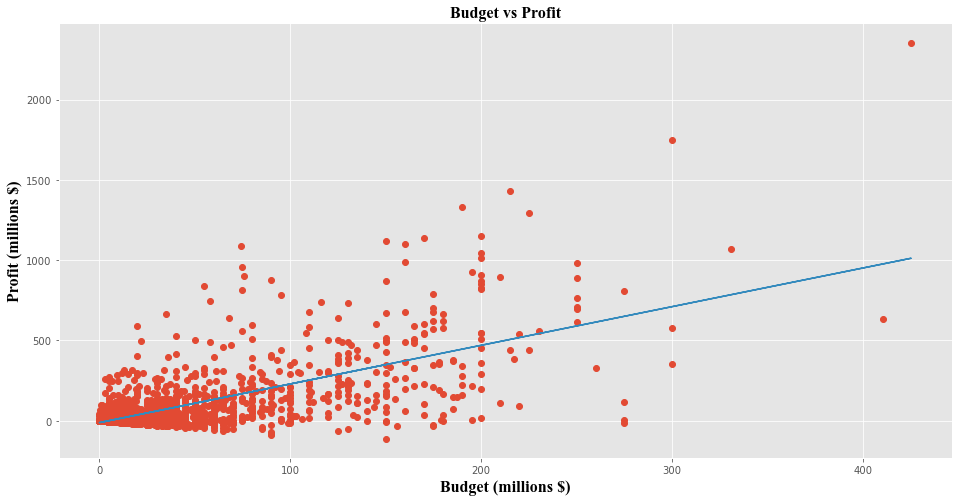

In [405]:
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (16, 8))
x = final_df['production_budget']/1000000
y = final_df['profit']/1000000
ax.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x+b)
plt.xlabel('Budget (millions $)', fontdict=font)
plt.ylabel('Profit (millions $)', fontdict=font)
plt.title('Budget vs Profit', fontdict=font)

plt.show()

In [406]:
#Correlation
final_df[['production_budget','profit']].corr()

,production_budget,profit
production_budget,1.000000,0.685621
profit,0.685621,1.000000


Notes: 
- Larger budget = larger profit
- The correlation between production_budget and profit is moderately high (0.69)

In [407]:
#What is the average profit for movies with budget >= 200 million?
budget_above_200m_df = final_df[final_df['production_budget'] >= 200000000]
budget_above_200m_df['profit'].mean()

680230389.4418604

$680 million

In [408]:
#What is the average profit for movies with budget < 200 million?
budget_below_200m_df = final_df[final_df['production_budget'] < 200000000]
budget_below_200m_df['profit'].mean()

67383465.6922658

$67 million

In [409]:
#What are the production budgets of the top 10 most profitable movies?
most_profitable_df = final_df.sort_values(by=['profit'], ascending=False)
top_ten_profit_df = most_profitable_df[:10]
top_ten_profit_df

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month,release_year
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,162.0,cross-genre,2351345279,12,2009
3,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,en,80.773,8.3,13948,149.0,cross-genre,1748134200,4,2018
26,2015-06-12,jurassic world,215000000,652270625,1648854864,en,20.709,6.6,14056,124.0,cross-genre,1433854864,6,2015
93,2015-04-03,furious 7,190000000,353007020,1518722794,en,20.396,7.3,6538,137.0,cross-genre,1328722794,4,2015
20,2012-05-04,the avengers,225000000,623279547,1517935897,en,50.289,7.6,19673,143.0,cross-genre,1292935897,5,2012
60,2018-02-16,black panther,200000000,700059566,1348258224,en,44.140,7.4,12365,134.0,cross-genre,1148258224,2,2018
154,2018-06-22,jurassic world: fallen kingdom,170000000,417719760,1305772799,en,34.958,6.5,5995,128.0,cross-genre,1135772799,6,2018
213,2013-11-22,frozen,150000000,400738009,1272469910,en,26.183,7.3,9767,93.0,cross-genre,1122469910,11,2013
173,2017-03-17,beauty and the beast,160000000,504014165,1259199706,en,26.701,7.7,5730,129.0,cross-genre,1099199706,3,2017
1165,2015-07-10,minions,74000000,336045770,1160336173,en,9.338,6.4,7343,91.0,cross-genre,1086336173,7,2015


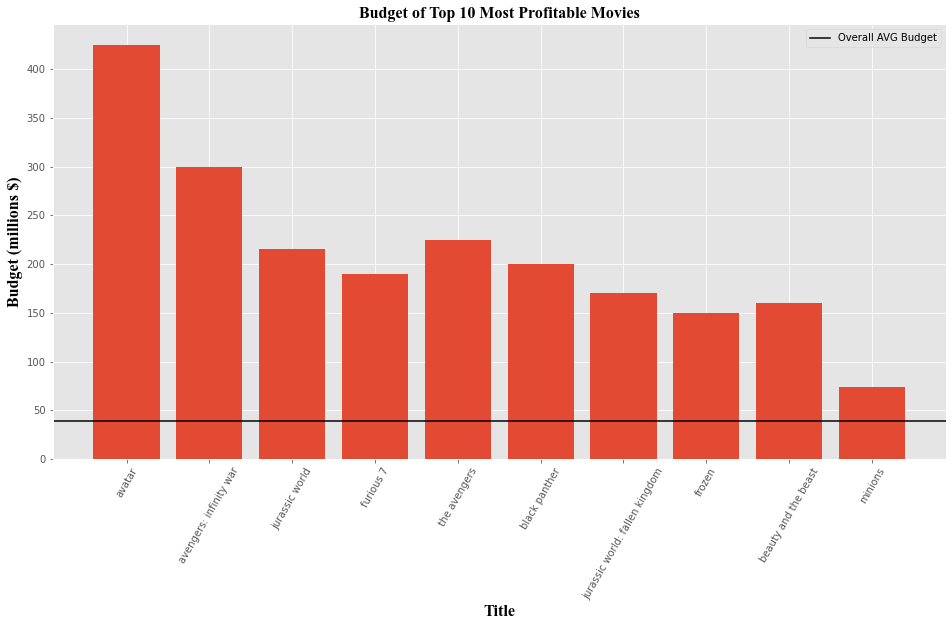

In [410]:
fig, ax = plt.subplots(figsize=(16,8))

x = top_ten_profit_df['title']
y = top_ten_profit_df['production_budget']/1000000

ax.bar(x,y)

ax.set_xlabel('Title', fontdict=font)
ax.set_ylabel('Budget (millions $)', fontdict=font)
ax.set_title('Budget of Top 10 Most Profitable Movies', fontdict=font)

plt.xticks(x, rotation=60);
plt.axhline(final_df['production_budget'].mean()/1000000, color='black', label='Overall AVG Budget');
plt.legend();

### B. genres vs profit

In [411]:
#Look into dataset of each genre
genres_df = final_df.groupby('genres')
genres_df.size()

genres
action            6
adventure         1
animation         4
biography         3
comedy           69
cross-genre    1552
documentary      67
drama           109
family            4
fantasy           4
horror           37
musical           2
mystery           2
romance           2
sci-fi            3
thriller         13
western           1
dtype: int64

Note: There is not enough data on specific genres to analyze.

### C. release_month vs profit

In [412]:
#Look at all genres and mean of profits
month_profit_df = final_df[['release_month', 'profit']]
mean_month_profit_df = month_profit_df.groupby('release_month', as_index=False).mean()
mean_month_profit_df

,release_month,profit
0,1,4.014091e+07
1,2,6.624628e+07
2,3,7.023648e+07
3,4,7.136186e+07
4,5,1.322796e+08
5,6,1.478909e+08
6,7,1.173484e+08
7,8,4.651537e+07
8,9,3.642184e+07
9,10,4.659402e+07


In [413]:
#Determine if there is enough data by month to analyze = YES!
profit_df = final_df.groupby('release_month')
profit_df.size()

release_month
1     117
2     140
3     166
4     152
5     127
6     150
7     150
8     159
9     166
10    183
11    159
12    210
dtype: int64

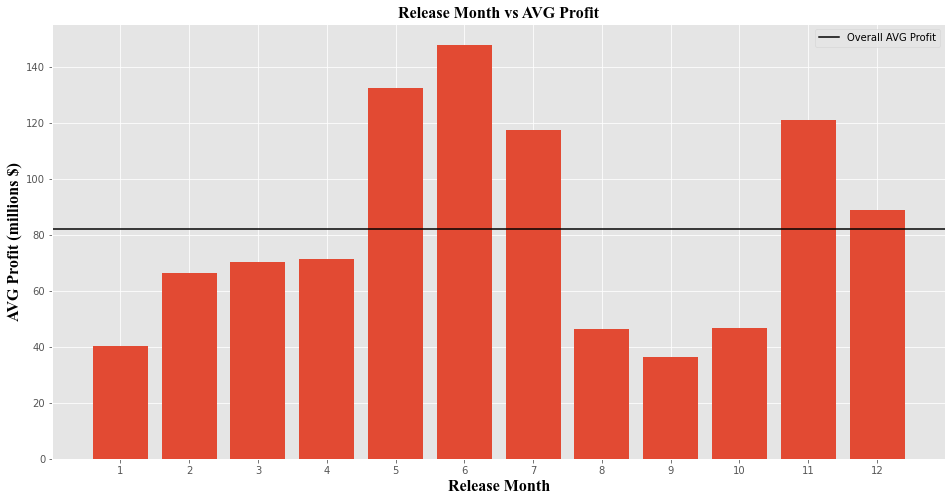

In [414]:
#plot = mean_month_profit_df.plot(kind='bar', figsize=(16,8), legend=False)

fig, ax = plt.subplots(figsize=(16,8))

x = mean_month_profit_df['release_month']
y = mean_month_profit_df['profit']/1000000

ax.bar(x,y)

ax.set_xlabel('Release Month', fontdict=font)
ax.set_ylabel('AVG Profit (millions $)', fontdict=font)
ax.set_title('Release Month vs AVG Profit', fontdict=font)
ax.set_xticks(x)

plt.axhline(mean_month_profit_df['profit'].mean()/1000000, color='black', label='Overall AVG Profit');
plt.legend();

Note: Best month to release a movie is June

### D. vote_average vs production_budget

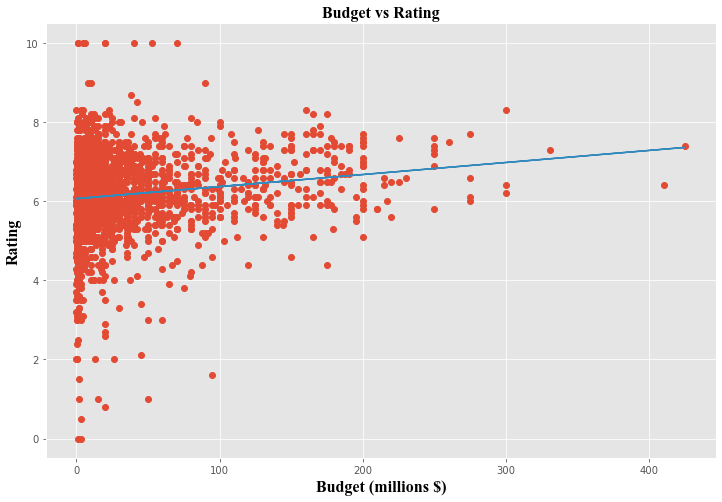

In [415]:
fig, ax = plt.subplots(figsize = (12, 8))
x = final_df['production_budget']/1000000
y = final_df['vote_average']
ax.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x+b)
plt.xlabel('Budget (millions $)', fontdict=font)
plt.ylabel('Rating', fontdict=font)
plt.title('Budget vs Rating', fontdict=font)

plt.show()

Note: Bigger budget = higher rating. However, there is a lot of datapoints clumped at around Rating 6 with smaller budget films. I do not want to encourage low-budget film making for Microsoft.

In [416]:
#Look into vote_count
final_df['vote_count'].describe()

count     1879.000000
mean      1721.489090
std       2710.819308
min          1.000000
25%         91.500000
50%        673.000000
75%       2107.000000
max      22186.000000
Name: vote_count, dtype: float64

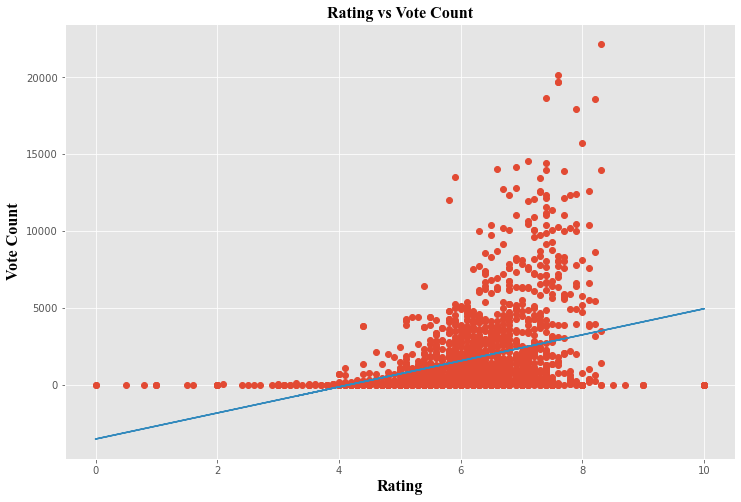

In [417]:
fig, ax = plt.subplots(figsize = (12, 8))
x = final_df['vote_average']
y = final_df['vote_count']
ax.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x+b)
plt.xlabel('Rating', fontdict=font)
plt.ylabel('Vote Count', fontdict=font)
plt.title('Rating vs Vote Count', fontdict=font)

plt.show()

Note: Looks very similar to Rating vs Budget

In [418]:
#Set min vote_count >= 700
new_vote_df = final_df[['vote_average', 'production_budget', 'vote_count']]
min_vote_df = new_vote_df[new_vote_df['vote_count'] >= 700]
min_vote_df.describe()

,vote_average,production_budget,vote_count
count,917.000000,9.170000e+02,917.000000
mean,6.495747,6.279150e+07,3328.918212
std,0.751878,6.295456e+07,3157.398056
min,4.000000,1.000000e+05,700.000000
25%,6.000000,1.900000e+07,1246.000000
50%,6.500000,4.000000e+07,2153.000000
75%,7.100000,9.000000e+07,4124.000000
max,8.300000,4.250000e+08,22186.000000


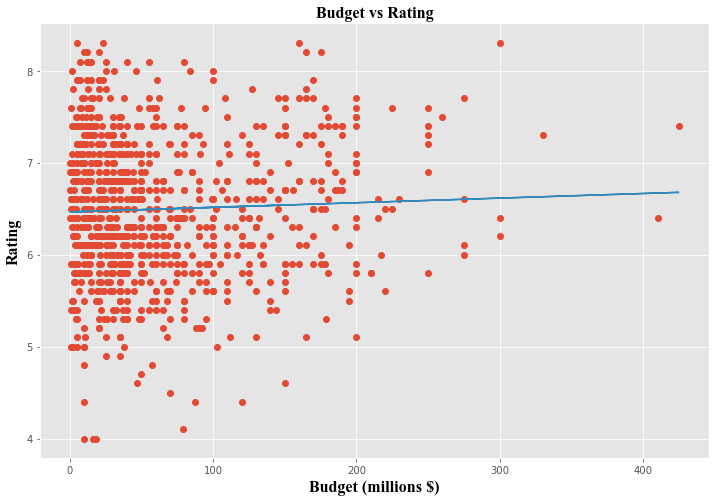

In [419]:
fig, ax = plt.subplots(figsize = (12, 8))
x = min_vote_df['production_budget']/1000000
y = min_vote_df['vote_average']
ax.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x+b)
plt.xlabel('Budget (millions $)', fontdict=font)
plt.ylabel('Rating', fontdict=font)
plt.title('Budget vs Rating', fontdict=font)

plt.show()

Note: Still a lot of noise. However rating range has been updated to 4-9.

In [420]:
#Group by Rating using a bar plot
#First, roundup vote_average
min_vote_df['vote_average'] = min_vote_df['vote_average'].round(decimals=0)

<ipython-input-420-eab069e28ee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_vote_df['vote_average'] = min_vote_df['vote_average'].round(decimals=0)


In [421]:
min_vote_df.head()

,vote_average,production_budget,vote_count
3611,7.0,5000000,4629
1761,6.0,35000000,1312
2433,8.0,20000000,6631
2609,7.0,18000000,4469
1261,6.0,61000000,2368


In [422]:
min_vote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 3611 to 216
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vote_average       917 non-null    float64
 1   production_budget  917 non-null    int64  
 2   vote_count         917 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 28.7 KB


In [423]:
grouped_vote_df = min_vote_df.groupby('vote_average')
grouped_vote_df.size()

vote_average
4.0      8
5.0     61
6.0    416
7.0    341
8.0     91
dtype: int64

In [424]:
#Groupby vote_average
grouped_vote_average_df = min_vote_df.groupby('vote_average', as_index=False).mean()
grouped_vote_average_df

,vote_average,production_budget,vote_count
0,4.0,5.137500e+07,1634.125000
1,5.0,5.288525e+07,1685.262295
2,6.0,6.402350e+07,2423.134615
3,7.0,6.104760e+07,3828.445748
4,8.0,7.133846e+07,6848.571429


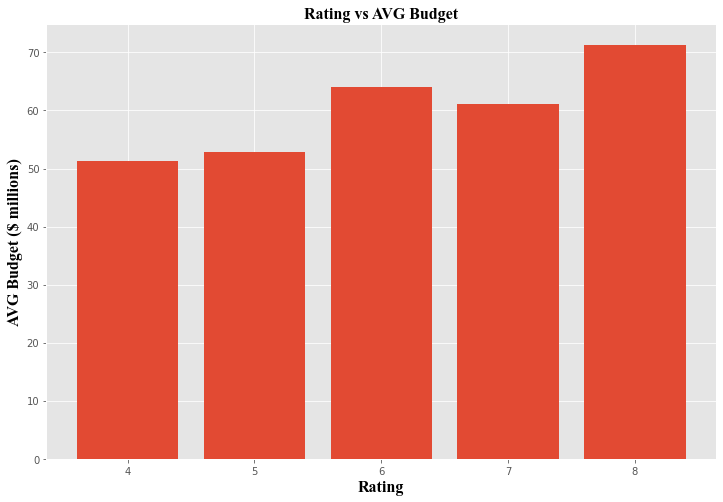

In [425]:
fig, ax = plt.subplots(figsize = (12, 8))
x = grouped_vote_average_df ['vote_average']
y = grouped_vote_average_df ['production_budget']/1000000

ax.bar(x, y)

ax.set_xlabel('Rating', fontdict=font)
ax.set_ylabel('AVG Budget ($ millions)', fontdict=font)
ax.set_title('Rating vs AVG Budget', fontdict=font)

plt.show()

Note: For a rating of 6 and higher, set budget at around $60,000,000

### E. runtime_minutes vs profit

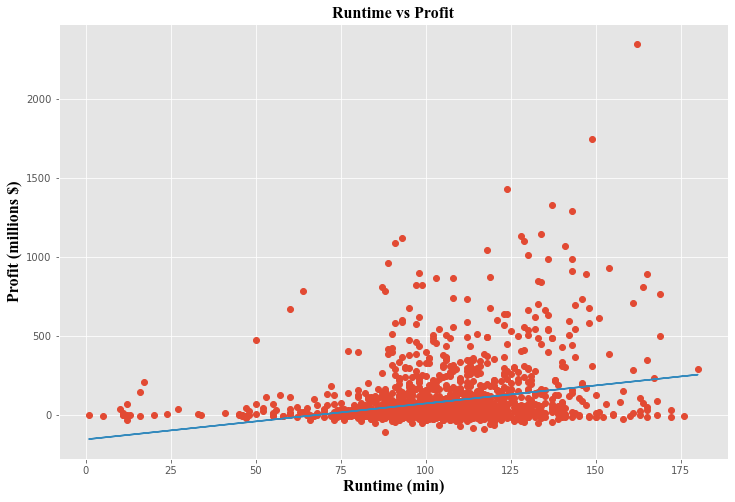

In [426]:
fig, ax = plt.subplots(figsize = (12, 8))
x = final_df['runtime_minutes']
y = final_df['profit']/1000000

ax.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x+b)
plt.xlabel('Runtime (min)', fontdict=font)
plt.ylabel('Profit (millions $)', fontdict=font)
plt.title('Runtime vs Profit', fontdict=font)

plt.show()

Note: Aim for 100-150 minutes for a higher profit margin

In [427]:
#What is the average profit for movies with a runtime 100-150 min?
rec_runtime_df = final_df[final_df['runtime_minutes'].between(100, 150)]
rec_runtime_df['profit'].mean()

99675866.8479307

$100 million

In [428]:
#What is the average profit for movies with runtime < 100
below_runtime_df = final_df[final_df['runtime_minutes'] < 100]
below_runtime_df['profit'].mean()

49197705.94658385

$50 million

In [429]:
#What is the average profit for movies with runtime > 150
above_runtime_df = final_df[final_df['runtime_minutes'] > 150]
above_runtime_df['profit'].mean()

279959166.14285713

$300 million (consider outliers and industry standards on preferred lengths)